In [1]:
#!pip install rir-generator
import tqdm
import numpy as np
import soundfile as sf
import rir_generator as rirgen
from generacion_rir import *

Se generan respuestas al impulso sinteticas por el metodo de fuente imagen. Se crean dos recintos segun el paper de FCNs, 15 respuestas al impulso para cada valor de tiempo de reverberacion (0.5 0.75 y 1.0 segundos). La generacion se hace desde el notebook para poder generar tambien los graficos que iran en el informe.

# ROOM 1

In [2]:
# Parametros de generacion
room1_dim = [8,6,4]
source = [1,3,1.5]
receiver_positions = rand_positions(room1_dim, 30)
trs = [0.5, 0.75, 1.0]
save_path = '/home/martin/deep-dereverb/preprocessing/rir_generacion/generados'

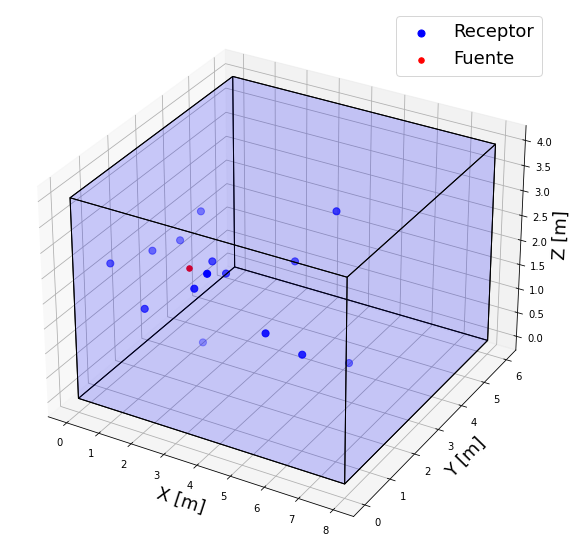

In [14]:
plot_room(room1_dim, source, receiver_positions, '')
plt.savefig('room1.png')

In [4]:
room1_params = {'c' : 340,
                'fs' : 16000,
                'r' : receiver_positions,
                's' : source,
                'L' : room1_dim,
                'nsample' : 32768}

In [5]:
impulsos = []
for tr in tqdm.tqdm(trs):
    h = rirgen.generate(reverberation_time=tr, **room1_params)
    impulsos.append(h)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [33:25<00:00, 668.38s/it]


In [8]:
# Guardando los archivos generados
for i,h in enumerate(impulsos):
    tr_label = str(trs[i])
    for receiver in range(h.shape[-1]):
        filename = save_path +'/room1/' +tr_label + 'p' + str(receiver) + '.wav'
        impulso = norm_to_save(h[:,receiver])
        sf.write(filename, impulso, 16000)

# ROOM 2

In [4]:
# Parametros de generacion
room2_dim = [6,4,3.5]
source = [1,3,1.5]
receiver_positions = rand_positions(room2_dim, 15)
trs = [0.5, 0.75, 1.0]
save_path = '/home/martin/deep-dereverb/preprocessing/rir_generacion/generados'

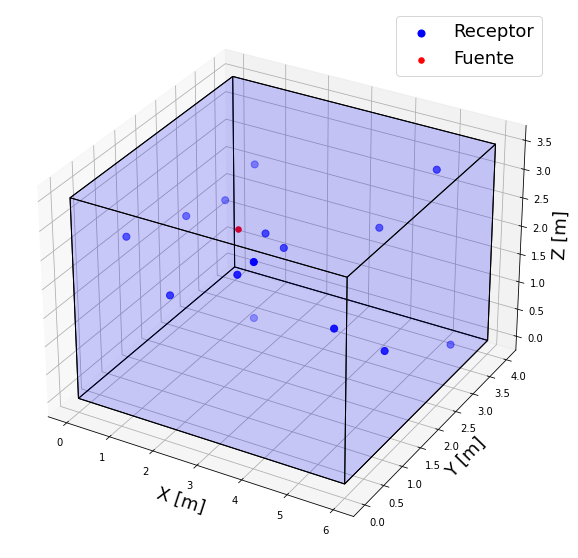

In [13]:
plot_room(room2_dim, source, receiver_positions, '')
plt.savefig('room2.png')

In [11]:
room1_params = {'c' : 340,
                'fs' : 16000,
                'r' : receiver_positions,
                's' : source,
                'L' : room1_dim,
                'nsample' : 32768}

In [12]:
impulsos = []
for tr in tqdm.tqdm(trs):
    h = rirgen.generate(reverberation_time=tr, **room1_params)
    impulsos.append(h)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [16:23<00:00, 327.77s/it]


In [13]:
# Guardando los archivos generados
for i,h in enumerate(impulsos):
    tr_label = str(trs[i])
    for receiver in range(h.shape[-1]):
        filename = save_path +'/room2/' + tr_label + 'p' + str(receiver) + '.wav'
        impulso = norm_to_save(h[:,receiver])
        sf.write(filename, impulso, 16000)